# Prediction on test images

Import necessary libraries

In [1]:
import numpy as np
from keras.preprocessing import image

Define test images

cat.shape: (1, 150, 150, 3)
dog.shape: (1, 150, 150, 3)


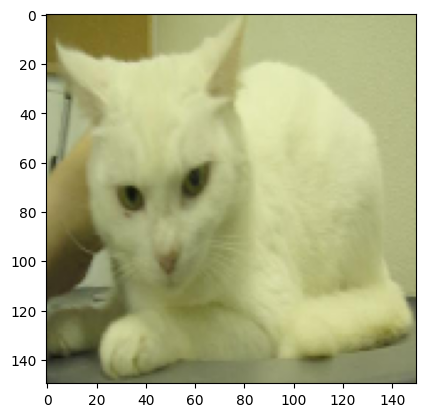

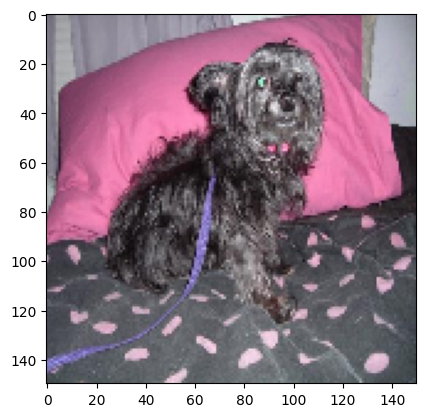

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cat_image_path = 'data/cats-v-dogs/testing/cats/13.jpg'
dog_image_path = 'data/cats-v-dogs/testing/dogs/0.jpg'

cat_img = tf.keras.utils.load_img(cat_image_path, target_size=(150, 150))
cat = np.array(cat_img)
cat = np.expand_dims(cat, axis=0)
dog_img = tf.keras.utils.load_img(dog_image_path, target_size=(150, 150))
dog = np.array(dog_img)
dog = np.expand_dims(dog, axis=0)

print('cat.shape:', cat.shape)
print('dog.shape:', dog.shape)

imgplot = plt.imshow(cat_img)
plt.show()

imgplot = plt.imshow(dog_img)
plt.show()



Load the model

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

INPUT_SHAPE = (150, 150, 3)

pre_trained_model = InceptionV3(input_shape=INPUT_SHAPE,
                                include_top=False,
                                weights=None)
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(pre_trained_model.input, x)
model.load_weights('model/inception_v3.h5')

Predict on test images

1/1 [==============================] - 3s 3s/step


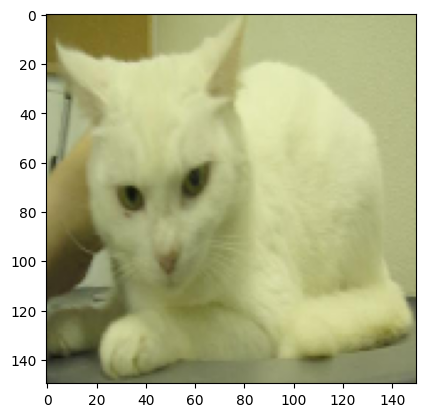

1st prediction:  cat
1/1 [==============================] - 0s 50ms/step


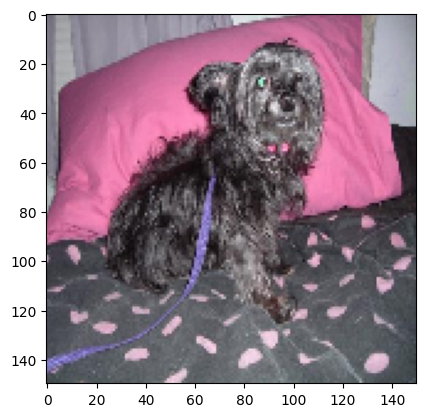

2nd prediction:  dog


: 

In [4]:
def translate_prediction(prediction):
    if prediction[0] > 0.5:
        return 'dog'
    else:
        return 'cat'

cat_pred = model.predict(cat)
imgplot = plt.imshow(cat_img)
plt.show()
cat_pred = translate_prediction(cat_pred)
print("1st prediction: ", cat_pred)
dog_pred = model.predict(dog)
imgplot = plt.imshow(dog_img)
plt.show()
dog_pred = translate_prediction(dog_pred)
print("2nd prediction: ", dog_pred)